In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
%matplotlib inline

E:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
train_path = '../CNN-Keras/train'
valid_path = '../CNN-Keras/valid'
test_path = '../CNN-Keras/test'

In [3]:
train_batchs = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dogs','cats'], batch_size=10)
valid_batchs = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dogs','cats'], batch_size=4)
test_batchs = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dogs','cats'], batch_size=10)

Found 42 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model = Model(input=mobile.input, output=predictions)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [7]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [19]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit_generator(train_batchs, steps_per_epoch=4, validation_data=valid_batchs, validation_steps=4,
                   epochs=5, verbose=2)

Epoch 1/5
 - 2s - loss: 0.2737 - acc: 0.8675 - val_loss: 2.7556 - val_acc: 0.5000
Epoch 2/5
 - 0s - loss: 0.1443 - acc: 0.9475 - val_loss: 4.8851 - val_acc: 0.5000
Epoch 3/5
 - 0s - loss: 0.6177 - acc: 0.9000 - val_loss: 5.1490 - val_acc: 0.5000
Epoch 4/5
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 3.7300 - val_acc: 0.5000
Epoch 5/5
 - 0s - loss: 0.6941 - acc: 0.8938 - val_loss: 4.9865 - val_acc: 0.5000


In [10]:
test_labels = test_batchs.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
test_batchs.class_indices

{'dogs': 0, 'cats': 1}

In [12]:
predictions = model.predict_generator(test_batchs, steps=1)

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

In [16]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [17]:
test_batchs.class_indices

{'dogs': 0, 'cats': 1}

Confusion matrix, without normalization
[[0 5]
 [0 5]]


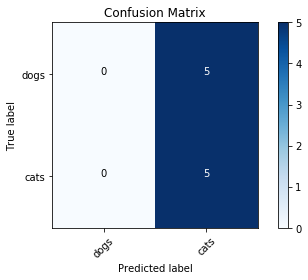

In [22]:
cm_class_labels = ['dogs', 'cats']
plot_confusion_matrix(cm, cm_class_labels, title='Confusion Matrix')